### We have a json file with information about Pokemon that we want to collect into a dataframe. We will use the UniqueID as the pokemon name.

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
req = requests.get('https://pastebin.com/raw/r1HwmQt0')

In [3]:
pokemon_dict = req.json()

In [4]:
pokemon_dict

{'Pokemon': [{'TemplateId': 'V0001_POKEMON_BULBASAUR',
   'Pokemon': {'UniqueID': 'V0001_POKEMON_BULBASAUR',
    'ModelScale': 1.09,
    'Type1': 'POKEMON_TYPE_GRASS',
    'Type2': 'POKEMON_TYPE_POISON',
    'Camera': {'DiskRadiusM': 0.5723,
     'CylRadiusM': 0.3815,
     'CylHeightM': 0.763,
     'ShoulderModeScale': 0.5},
    'Encounter': {'BaseCaptureRate': 0.16,
     'BaseFleeRate': 0.1,
     'CollisionRadiusM': 0.3815,
     'CollisionHeightM': 0.654,
     'CollisionHeadRadiusM': 0.2725,
     'MovementType': 'POKEMON_ENC_MOVEMENT_JUMP',
     'MovementTimerS': 10,
     'JumpTimeS': 1.15,
     'AttackTimerS': 29},
    'Stats': {'BaseStamina': 90, 'BaseAttack': 126, 'BaseDefense': 126},
    'QuickMoves': '\\326\\001\\335\\001',
    'CinematicMoves': 'Z;v',
    'AnimTime': 'bla',
    'Evolution': '\\002',
    'EvolutionPips': 1,
    'PokedexHeightM': 0.7,
    'PokedexWeightKg': 6.9,
    'HeightStdDev': 0.0875,
    'WeightStdDev': 0.8625,
    'FamilyID': 'V0001_FAMILY_BULBASAUR',
    '

In [5]:
type(pokemon_dict['Pokemon'])

list

#### 1) Make a list containing every Pokemon name (UniqueID). Be careful of Pokemon "MOVE"s that are also in the top level. Your list should not include UniqueIDs that begin like this:"V0013_MOVE". Only ones that are formatted like this: "V0013_POKEMON". Your list length should be 151.

In [6]:
pokemon_dict['Pokemon'][0]['Pokemon']['UniqueID']

'V0001_POKEMON_BULBASAUR'

In [7]:
pokemon_list = []

for item in pokemon_dict['Pokemon']:
    try:
        pokemon_list.append(item['Pokemon']['UniqueID'])
    except:
        pass

In [8]:
pokemon_list

['V0001_POKEMON_BULBASAUR',
 'V0002_POKEMON_IVYSAUR',
 'V0003_POKEMON_VENUSAUR',
 'V0004_POKEMON_CHARMANDER',
 'V0005_POKEMON_CHARMELEON',
 'V0006_POKEMON_CHARIZARD',
 'V0007_POKEMON_SQUIRTLE',
 'V0008_POKEMON_WARTORTLE',
 'V0009_POKEMON_BLASTOISE',
 'V0010_POKEMON_CATERPIE',
 'V0011_POKEMON_METAPOD',
 'V0012_POKEMON_BUTTERFREE',
 'V0013_POKEMON_WEEDLE',
 'V0014_POKEMON_KAKUNA',
 'V0015_POKEMON_BEEDRILL',
 'V0016_POKEMON_PIDGEY',
 'V0017_POKEMON_PIDGEOTTO',
 'V0018_POKEMON_PIDGEOT',
 'V0019_POKEMON_RATTATA',
 'V0020_POKEMON_RATICATE',
 'V0021_POKEMON_SPEAROW',
 'V0022_POKEMON_FEAROW',
 'V0023_POKEMON_EKANS',
 'V0024_POKEMON_ARBOK',
 'V0025_POKEMON_PIKACHU',
 'V0026_POKEMON_RAICHU',
 'V0027_POKEMON_SANDSHREW',
 'V0028_POKEMON_SANDSLASH',
 'V0029_POKEMON_NIDORAN',
 'V0030_POKEMON_NIDORINA',
 'V0031_POKEMON_NIDOQUEEN',
 'V0032_POKEMON_NIDORAN',
 'V0033_POKEMON_NIDORINO',
 'V0034_POKEMON_NIDOKING',
 'V0035_POKEMON_CLEFAIRY',
 'V0036_POKEMON_CLEFABLE',
 'V0037_POKEMON_VULPIX',
 'V0038_POKEM

In [9]:
len(pokemon_list)

151

#### 2) Create two new lists. One should contain only the Pokemon name itself (e.g. 'BULBASAUR') with the 'V0001_POKEMON_' portion of the string removed. The other should have the Pokemon ID (e.g. 'V0001') stored as a string. All three lists should be the same length.

Note: There is one pokemon with two names separated by an underscore, don't worry about getting both parts of his name

In [10]:
poke_id = []
pokemon_name = []

for pokemon in pokemon_list:
    separated = pokemon.split('_')
    poke_id.append(separated[0])
    pokemon_name.append(separated[2])

#### 3) Create a dataframe with the ID (e.g. 'V0001') as the index and the pokemon name (e.g. 'Bulbasaur') as the first column.

In [11]:
poke_df = pd.DataFrame(pokemon_name, index = poke_id, columns = ['pokemon_name'])

In [12]:
poke_df = poke_df.reset_index()

In [13]:
poke_dict_list = pokemon_dict['Pokemon']

In [14]:
final_dict_list = []

for item in poke_dict_list:
    if 'MOVE' not in item['TemplateId']:
        final_dict_list.append(item)

#### 4) Now let's add the following information to the dataframe as separate columns: 'Type1', 'PokedexHeightM', and 'BaseAttack'. Your final dataframe should have the Pokemon ID as the index and 4 columns of information, the pokemon name, along with the 3 previously listed columns. 

Note: If it is easier, you can create an entirely new dataframe instead of building on from step 3

In [15]:
poke_df.to_dict(orient = 'records')

[{'index': 'V0001', 'pokemon_name': 'BULBASAUR'},
 {'index': 'V0002', 'pokemon_name': 'IVYSAUR'},
 {'index': 'V0003', 'pokemon_name': 'VENUSAUR'},
 {'index': 'V0004', 'pokemon_name': 'CHARMANDER'},
 {'index': 'V0005', 'pokemon_name': 'CHARMELEON'},
 {'index': 'V0006', 'pokemon_name': 'CHARIZARD'},
 {'index': 'V0007', 'pokemon_name': 'SQUIRTLE'},
 {'index': 'V0008', 'pokemon_name': 'WARTORTLE'},
 {'index': 'V0009', 'pokemon_name': 'BLASTOISE'},
 {'index': 'V0010', 'pokemon_name': 'CATERPIE'},
 {'index': 'V0011', 'pokemon_name': 'METAPOD'},
 {'index': 'V0012', 'pokemon_name': 'BUTTERFREE'},
 {'index': 'V0013', 'pokemon_name': 'WEEDLE'},
 {'index': 'V0014', 'pokemon_name': 'KAKUNA'},
 {'index': 'V0015', 'pokemon_name': 'BEEDRILL'},
 {'index': 'V0016', 'pokemon_name': 'PIDGEY'},
 {'index': 'V0017', 'pokemon_name': 'PIDGEOTTO'},
 {'index': 'V0018', 'pokemon_name': 'PIDGEOT'},
 {'index': 'V0019', 'pokemon_name': 'RATTATA'},
 {'index': 'V0020', 'pokemon_name': 'RATICATE'},
 {'index': 'V0021',

In [16]:
final_dict_list[0]['Pokemon']['Encounter']['MovementType']

'POKEMON_ENC_MOVEMENT_JUMP'

In [17]:
Type1 = []
BaseStamina = []
BaseAttack = []
BaseDefense = []
PokedexHeightM = []

for pokemon in final_dict_list:
    Type1.append(pokemon['Pokemon']['Type1'])
    BaseStamina.append(pokemon['Pokemon']['Stats']['BaseStamina'])
    BaseAttack.append(pokemon['Pokemon']['Stats']['BaseAttack'])
    BaseDefense.append(pokemon['Pokemon']['Stats']['BaseDefense'])
    PokedexHeightM.append(pokemon['Pokemon']['PokedexHeightM'])

In [18]:
poke_df = poke_df.set_index('index')

In [19]:
poke_df['Type1'] = Type1

In [20]:
poke_df['BaseStamina'] = BaseStamina
poke_df['BaseAttack'] = BaseAttack
poke_df['BaseDefense'] = BaseDefense
poke_df['PokedexHeightM'] = PokedexHeightM

#### 5) Find which Pokemon Type has the highest average BaseAttack

In [21]:
poke_df.groupby('Type1').mean()['BaseAttack'].sort_values(ascending=False)

Type1
POKEMON_TYPE_FIRE        185.833333
POKEMON_TYPE_ICE         185.000000
POKEMON_TYPE_DRAGON      182.666667
POKEMON_TYPE_PSYCHIC     171.250000
POKEMON_TYPE_GRASS       171.166667
POKEMON_TYPE_GHOST       170.666667
POKEMON_TYPE_ELECTRIC    168.000000
POKEMON_TYPE_FIGHTING    150.857143
POKEMON_TYPE_ROCK        149.555556
POKEMON_TYPE_WATER       147.857143
POKEMON_TYPE_FAIRY       147.000000
POKEMON_TYPE_POISON      145.142857
POKEMON_TYPE_NORMAL      131.181818
POKEMON_TYPE_GROUND      126.750000
POKEMON_TYPE_BUG         121.666667
Name: BaseAttack, dtype: float64

#### 6) Plot the top 10 Pokemon Types by highest average BaseAttack

In [22]:
import matplotlib.pyplot as plt

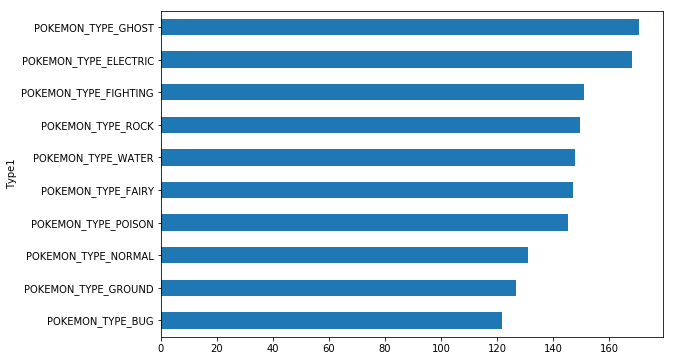

In [23]:
plt.figure(figsize = (9,6))
poke_df.groupby('Type1').mean()['BaseAttack'].sort_values(ascending=True)[0:10].plot(kind = 'barh');